# Exercise 1 (10 points)

In this exercise, we will practice refactoring concepts in analytics/data science tasks. You are given a dataset about employees, including information such as their department, salary, and years of experience. Your task is to analyze the dataset and then refactor the code for readability and efficiency. 

### Exercise 1(a) (3 points)

Load `pandas` and create a data-frame called `df` using the below data dictionary:

```
data = {
    'EmployeeID': [101, 102, 103, 104, 105],
    'Department': ['Engineering', 'HR', 'Engineering', 'Sales', 'HR'],
    'Salary': [70000, 50000, 75000, 45000, 60000],
    'YearsExperience': [5, 3, 7, 2, 4]
}
```

In [1]:
import pandas as pd 

data = {
    'EmployeeID': [101, 102, 103, 104, 105],
    'Department': ['Engineering', 'HR', 'Engineering', 'Sales', 'HR'],
    'Salary': [70000, 50000, 75000, 45000, 60000],
    'YearsExperience': [5, 3, 7, 2, 4]
}

df = pd.DataFrame(data)
df

,EmployeeID,Department,Salary,YearsExperience
0,101,Engineering,70000,5
1,102,HR,50000,3
2,103,Engineering,75000,7
3,104,Sales,45000,2
4,105,HR,60000,4


### Exercise 1(b) (4 points)

The below code snippet has three functions the perform the following:

- `calculate_average_salary` computes the average salary by department.
- `calculate_median_experience` computes the median years of experience for each department.
- `high_earners` identifies employees who earn above a certain salary threshold. 


```
# Calculate average salary by department
def calculate_average_salary(dataframe):
    avg_salary = dataframe.groupby('Department')['Salary'].mean()
    return avg_salary

# Calculate median years of experience by department
def calculate_median_experience(dataframe):
    median_exp = dataframe.groupby('Department')['YearsExperience'].median()
    return median_exp

# Identify employees with salaries above a certain threshold
def high_earners(dataframe, threshold):
    return dataframe[dataframe['Salary'] > threshold]

```

Make sure the above function are working as expected by applying them to the `df` data-frame.

In [2]:
# Calculate average salary by department
def calculate_average_salary(dataframe):
    avg_salary = dataframe.groupby('Department')['Salary'].mean()
    return avg_salary

# Calculate median years of experience by department
def calculate_median_experience(dataframe):
    median_exp = dataframe.groupby('Department')['YearsExperience'].median()
    return median_exp

# Identify employees with salaries above a certain threshold
def high_earners(dataframe, threshold):
    return dataframe[dataframe['Salary'] > threshold]


In [3]:
print('---- Average salary ----\n',calculate_average_salary(df))
print('---- Median salary ----\n', calculate_median_experience(df))
print('---- Earners over 60,000 ----\n', high_earners(df,60000))


---- Average salary ----
 Department
Engineering    72500.0
HR             55000.0
Sales          45000.0
Name: Salary, dtype: float64
---- Median salary ----
 Department
Engineering    6.0
HR             3.5
Sales          2.0
Name: YearsExperience, dtype: float64
---- Earners over 60,000 ----
    EmployeeID   Department  Salary  YearsExperience
0         101  Engineering   70000                5
2         103  Engineering   75000                7


### Exercise 1(c) (6 points)

To improve code modularity, separate reusable components. Specifically:

- Add a helper function called `calculate_group_stat` to calculate group statistics (e.g., mean or median).
- Refactor the `calculate_average_salary` and `calculate_median_experience` functions to use the `calculate_group_stat` function.

Then, apply the refactored functions to the `df` data-frame

In [4]:
def calculate_group_stat(dataframe, stat_type):
    if stat_type == 'mean':
        return calculate_average_salary(dataframe)
    elif stat_type == 'median':
        return calculate_median_experience(dataframe)
    else:
        raise ValueError("stat_type must be either 'mean' or 'median'")

# calculate average salary by department
def calculate_average_salary(dataframe):
    avg_salary = dataframe.groupby('Department')['Salary'].mean()
    return avg_salary

# calculate median years of experience by department
def calculate_median_experience(dataframe):
    median_exp = dataframe.groupby('Department')['YearsExperience'].median()
    return median_exp


In [5]:
print('---- Average salary ----\n',calculate_group_stat(df, 'mean'))
print('---- Median salary ----\n', calculate_group_stat(df, 'median'))

---- Average salary ----
 Department
Engineering    72500.0
HR             55000.0
Sales          45000.0
Name: Salary, dtype: float64
---- Median salary ----
 Department
Engineering    6.0
HR             3.5
Sales          2.0
Name: YearsExperience, dtype: float64


### Exercise 1(d) (8 points)

To improve the readability of the functions, a description for each of the function. For example:

```
def high_earners(dataframe, threshold):
    """
    Identify employees with salaries above a certain threshold.

    Args:
        dataframe (pd.DataFrame): The DataFrame containing the data.
        threshold (int): The salary threshold to filter by.

    Returns:
        pd.DataFrame: A DataFrame of employees with salaries above the threshold.
    """
    return dataframe[dataframe['Salary'] > threshold]
```

Notice the function description.

In [6]:
def calculate_group_stat(dataframe, stat_type):
    """
    Calculate the mean or median of group Salary.

    Args:
        dataframe (pd.DataFrame): The DataFrame containing the data.
        stat_type (string: The stat you would like to calculate

    Returns:
        A list of mean or median salaries grouped by department.
    """
    if stat_type == 'mean':
        return calculate_average_salary(dataframe)
    elif stat_type == 'median':
        return calculate_median_experience(dataframe)
    else:
        raise ValueError("stat_type must be either 'mean' or 'median'")

# calculate average salary by department
def calculate_average_salary(dataframe):
    """
    calls helper funtion to calculate the mean.

    Args:
        dataframe (pd.DataFrame): The DataFrame containing the data.

    Returns:
        A list of mean salaries grouped by department.
    """
    avg_salary = dataframe.groupby('Department')['Salary'].mean()
    return avg_salary

# calculate median years of experience by department
def calculate_median_experience(dataframe):
    """
    calls helper funtion to calculate the median.

    Args:
        dataframe (pd.DataFrame): The DataFrame containing the data.

    Returns:
        A list of median salaries grouped by department.
    """
    median_exp = dataframe.groupby('Department')['YearsExperience'].median()
    return median_exp

def high_earners(dataframe, threshold):
    """
    Identify employees with salaries above a certain threshold.

    Args:
        dataframe (pd.DataFrame): The DataFrame containing the data.
        threshold (int): The salary threshold to filter by.

    Returns:
        pd.DataFrame: A DataFrame of employees with salaries above the threshold.
    """
    return dataframe[dataframe['Salary'] > threshold]

### Exercise 1(e) (6 points)

Test the refactored code with test cases to ensure accuracy.

In [7]:
print('---- Average salary ----\n',calculate_group_stat(df, 'mean'))
print('---- Median salary ----\n', calculate_group_stat(df, 'median'))
print('---- Earners over 60,000 ----\n', high_earners(df,60000))

---- Average salary ----
 Department
Engineering    72500.0
HR             55000.0
Sales          45000.0
Name: Salary, dtype: float64
---- Median salary ----
 Department
Engineering    6.0
HR             3.5
Sales          2.0
Name: YearsExperience, dtype: float64
---- Earners over 60,000 ----
    EmployeeID   Department  Salary  YearsExperience
0         101  Engineering   70000                5
2         103  Engineering   75000                7


# Exercise 2

In this exercise, we will practice `polars` operations. Consider the `Electronic_sales_Sep2023-Sep2024.csv` data file. This dataset contains sales transaction records for an electronics company over a one-year period, spanning from September 2023 to September 2024. It includes detailed information about customer demographics, product types, and purchase behaviors. This is a brief description of each columns in the data file.

- `Customer ID`: Unique identifier for each customer.
- `Age`: Age of the customer (numeric)
- `Gender`: Gender of the customer (Male or Female)
- `Loyalty Member`: (Yes/No) (Values change by time, so pay attention to who cancelled and who signed up)
- `Product Type`: Type of electronic product sold (e.g., Smartphone, Laptop, Tablet)
- `SKU`: a unique code for each product.
- `Rating`: Customer rating of the product (1-5 stars) (Should have no Null Ratings)
- `Order Status`: Status of the order (Completed, Cancelled)
- `Payment Method`: Method used for payment (e.g., Cash, Credit Card, Paypal)
- `Total Price`: Total price of the transaction (numeric)
- `Unit Price`: Price per unit of the product (numeric)
- `Quantity`: Number of units purchased (numeric)
- `Purchase Date`: Date of the purchase (format: YYYY-MM-DD)
- `Shipping Type`: Type of shipping chosen (e.g., Standard, Overnight, Express)
- `Add-ons Purchased`: List of any additional items purchased (e.g., Accessories, Extended Warranty)
- `Add-on Total`: Total price of add-ons purchased (numeric)


### Exercise 2(a) (2 points)

Load `polars`, `matplotlib.pyplot` and `seaborn`.

In [8]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

### Exercise 2(b) (2 points)

Read the `Electronic_sales_Sep2023-Sep2024.csv` data file and create a data frame called `df`. Report the shape of `df`.

In [9]:
df = pl.read_csv('Electronic_sales_Sep2023-Sep2024.csv')
df.shape

(20000, 16)

### Exercise 2(c) (3 points)

Report the number of unique `Customer ID`.

In [10]:
df['Customer ID'].unique().count()

12136

### Exercise 2(d) (3 points)

Create a column called `Total_Spending`, which is the sum of `Total Price` and `Add-on Total`.

In [11]:
df = df.with_columns((df['Total Price'] + df['Add-on Total']).alias('Total_Spending'))
df.head()

Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total,Total_Spending
i64,i64,str,str,str,str,i64,str,str,f64,f64,i64,str,str,str,f64,f64
1000,53,"""Male""","""No""","""Smartphone""","""SKU1004""",2,"""Cancelled""","""Credit Card""",5538.33,791.19,7,"""2024-03-20""","""Standard""","""Accessory,Accessory,Accessory""",40.21,5578.54
1000,53,"""Male""","""No""","""Tablet""","""SKU1002""",3,"""Completed""","""Paypal""",741.09,247.03,3,"""2024-04-20""","""Overnight""","""Impulse Item""",26.09,767.18
1002,41,"""Male""","""No""","""Laptop""","""SKU1005""",3,"""Completed""","""Credit Card""",1855.84,463.96,4,"""2023-10-17""","""Express""",null,0.0,1855.84
1002,41,"""Male""","""Yes""","""Smartphone""","""SKU1004""",2,"""Completed""","""Cash""",3164.76,791.19,4,"""2024-08-09""","""Overnight""","""Impulse Item,Impulse Item""",60.16,3224.92
1003,75,"""Male""","""Yes""","""Smartphone""","""SKU1001""",5,"""Completed""","""Cash""",41.5,20.75,2,"""2024-05-21""","""Express""","""Accessory""",35.56,77.06


### Exercise 2(e) (3 points)

Compute the average `Total_Spending` by `Customer ID`. Report the `Customer ID`s with the smallest and largest average `Total_Spending`.

In [12]:
df.group_by('Customer ID').agg(pl.col('Total_Spending').mean().alias('Average_Spending'))
print(df[['Customer ID', 'Total_Spending']].head(1))
print(df[['Customer ID', 'Total_Spending']].tail(1))

shape: (1, 2)
┌─────────────┬────────────────┐
│ Customer ID ┆ Total_Spending │
│ ---         ┆ ---            │
│ i64         ┆ f64            │
╞═════════════╪════════════════╡
│ 1000        ┆ 5578.54        │
└─────────────┴────────────────┘
shape: (1, 2)
┌─────────────┬────────────────┐
│ Customer ID ┆ Total_Spending │
│ ---         ┆ ---            │
│ i64         ┆ f64            │
╞═════════════╪════════════════╡
│ 19998       ┆ 674.32         │
└─────────────┴────────────────┘


### Exercise 2(f) (5 points)

Report the most popular `Product Type` among `Male` and `Female`.

In [13]:
product_popularity = df.group_by(['Gender', 'Product Type']).agg(pl.count().alias('Product_Count')).sort(by=['Gender', 'Product_Count'])
product_popularity.group_by('Gender').tail(1)

C:\Users\gmgma\AppData\Local\Temp\ipykernel_11164\3777834776.py:1: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  product_popularity = df.group_by(['Gender', 'Product Type']).agg(pl.count().alias('Product_Count')).sort(by=['Gender', 'Product_Count'])


Gender,Product Type,Product_Count
str,str,u32
"""Female""","""Smartphone""",2980
"""Male""","""Smartphone""",2998
"""#N/A""","""Laptop""",1


### Exercise 2(g) (4 points)

Do loyal customers spend more? 

In [14]:
pip install pyarrow

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\gmgma\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


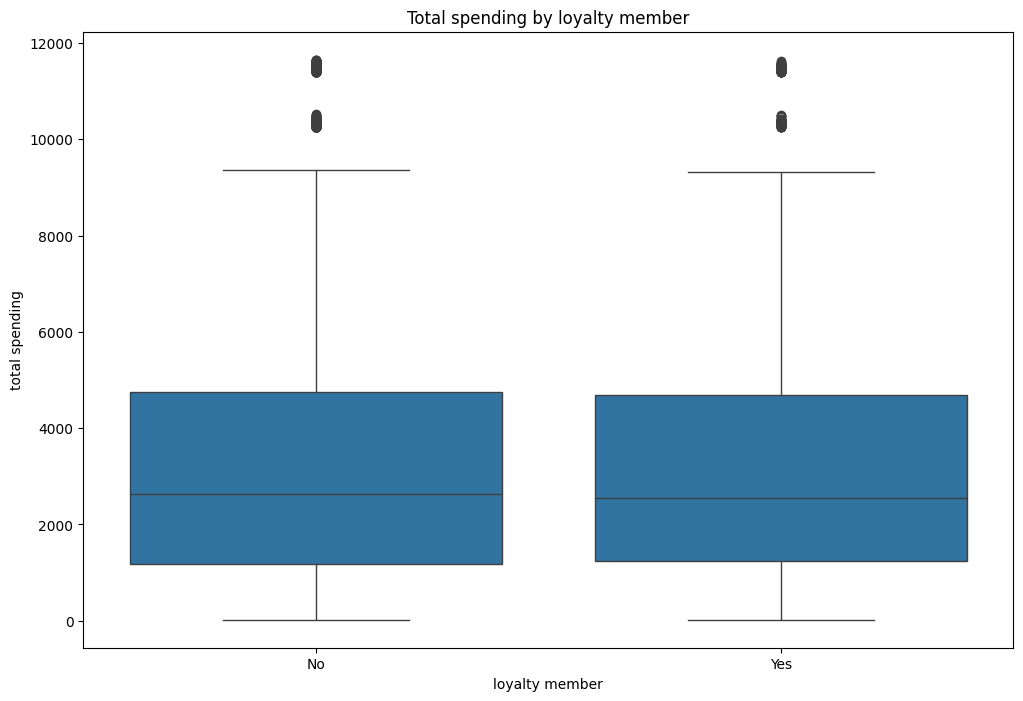

In [16]:
fig, ax = plt.subplots(figsize = (12,8))

sns.boxplot(x='Loyalty Member', y='Total_Spending', data=df.to_pandas())
plt.title('Total spending by loyalty member')
plt.xlabel('loyalty member')
plt.ylabel('total spending')
plt.show()

There does not appear to be any relationship between loyalty memeber and spending

### Exercise 2(h) (5 points)

Does age play a role on the total amount of the transaction?

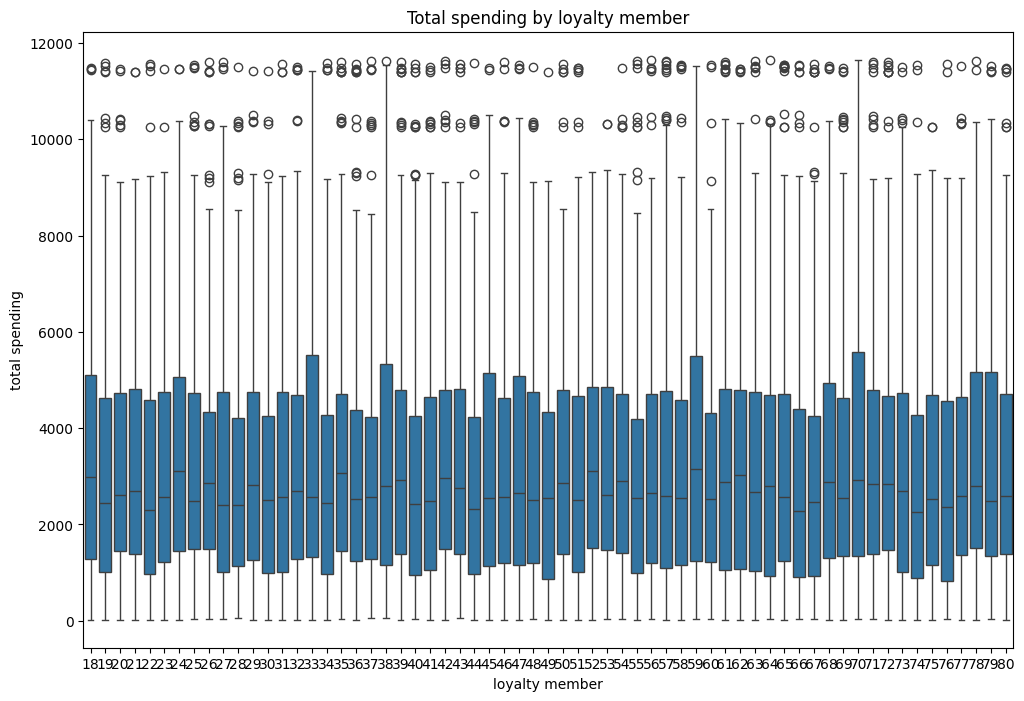

In [20]:
fig, ax = plt.subplots(figsize = (12,8))

sns.boxplot(x='Age', y='Total_Spending', data=df.to_pandas())
plt.title('Total spending by loyalty member')
plt.xlabel('loyalty member')
plt.ylabel('total spending')
plt.show()

There does not appear to be any relationship between age and spending